## Prever se um paciente poderá ser readmitido em uma clínica 30 dias após a alta

### "Exercício realizado durante o curso Data Science Aplicada à Área de Saúde"

## 1) Definição do problema

Nosso objetivo neste projeto será prever se um paciente poderá ser readmitido em uma clínica no período de 30 dias após alta. Para isso, faremos a construção de diversos modelos preditivos usando registros eletrônicos de saúde de uma clínica fictícia.

Esse projeto terá como base uma pesquisa realizada em 2018, chamada:

Using Electronic Health Records and Machine Learning to Make Medical-Related Predictions from Non-Medical Data

https://ieeexplore.ieee.org/document/8614004

## 2) Carregando os Dados

In [2]:
# Imports para carga e manipulação de dados
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib
matplotlib.__version__

'3.2.1'

In [4]:
# Carregando os dados
dataset = pd.read_csv('dados/dataset.csv', index_col = [0])
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


Dicionário de Dados

- IDADE - Idade do paciente (numérica)
- SEXO_F - paciente do sexo feminino (categórica)
- SEXO_M - paciente do sexo masculino (categórica)
- ADM_CORRENTE_DIAS - Dias desde a admissão atual (numérica)
- RECEB_MEDICAMENTOS - Recebeu medicamentos na última internação (categórica)
- FEZ_EXAMES - Fez exames na última internação (categórica)
- DEPEND_QUIMICO - Dependendo químico (categórica)
- FUMANTE - Fumante (categórica)
- ALCOOLISMO - Alcoolismo (categórica)
- NUM_DIAS_INT_PREVIA - Número de internações anteriores (numérica)
- ADM_PREVIA_DIAS - Dias da admissão anterior (numérica)
- NUM_DIAS_LIC_MEDICA - Licença médica (numérica)
- READMISSAO_30_DIAS - Readmissão dentro de 30 dias após a alta. Variável target. 0 - Não / 1 - Sim

## 3) Data Munging - Preparando os dados

In [5]:
# Shape
dataset.shape

(117180, 13)

In [6]:
# Tipos de Dados
dataset.dtypes

IDADE                  float64
SEXO_F                   int64
SEXO_M                   int64
ADM_CORRENTE_DIAS        int64
RECEB_MEDICAMENTOS       int64
FEZ_EXAMES               int64
DEPEND_QUIMICO           int64
FUMANTE                  int64
ALCOOLISMO               int64
NUM_DIAS_INT_PREVIA      int64
ADM_PREVIA_DIAS          int64
NUM_DIAS_LIC_MEDICA      int64
READMISSAO_30_DIAS       int64
dtype: object

In [7]:
# Resumo Estatístico
dataset.describe()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
count,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000
mean,65.066522,0.428239,0.571761,4.707680,0.160266,0.237020,0.597440,0.005274,0.008269,5.301988,12.328179,0.314456,0.189384
std,17.965229,0.494826,0.494826,6.257739,0.366854,0.425256,0.490416,0.072430,0.090559,14.324146,26.846820,3.366208,0.391815
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,1.000000,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,12.000000,0.000000,0.000000
max,114.000000,1.000000,1.000000,307.000000,1.000000,1.000000,1.000000,1.000000,1.000000,170.000000,627.000000,315.000000,1.000000


Verificando se temos valores ausentes

In [8]:
# Total por variável
dataset.isnull().sum()

IDADE                  0
SEXO_F                 0
SEXO_M                 0
ADM_CORRENTE_DIAS      0
RECEB_MEDICAMENTOS     0
FEZ_EXAMES             0
DEPEND_QUIMICO         0
FUMANTE                0
ALCOOLISMO             0
NUM_DIAS_INT_PREVIA    0
ADM_PREVIA_DIAS        0
NUM_DIAS_LIC_MEDICA    0
READMISSAO_30_DIAS     0
dtype: int64

In [9]:
# Total de linhas por coluna
dataset.count() 

IDADE                  117180
SEXO_F                 117180
SEXO_M                 117180
ADM_CORRENTE_DIAS      117180
RECEB_MEDICAMENTOS     117180
FEZ_EXAMES             117180
DEPEND_QUIMICO         117180
FUMANTE                117180
ALCOOLISMO             117180
NUM_DIAS_INT_PREVIA    117180
ADM_PREVIA_DIAS        117180
NUM_DIAS_LIC_MEDICA    117180
READMISSAO_30_DIAS     117180
dtype: int64

Verificando se temos dados duplicados

In [10]:
# Linhas contendo dados duplicados
linha_duplicadas = dataset[dataset.duplicated()]
print("Número de linhas duplicadas: ", linha_duplicadas.shape[0])

Número de linhas duplicadas:  60839


Embora o Pandas nos mostre como sendo dados duplicados, podemos ter pacientes com exatamente os mesmos registros.

In [11]:
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


In [12]:
# Função para visualizar a distribuição de cada variável
def cria_histograma(dataset, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataset[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature + " Distribuição", color = 'DarkRed')
        
    fig.tight_layout()  
    plt.show()

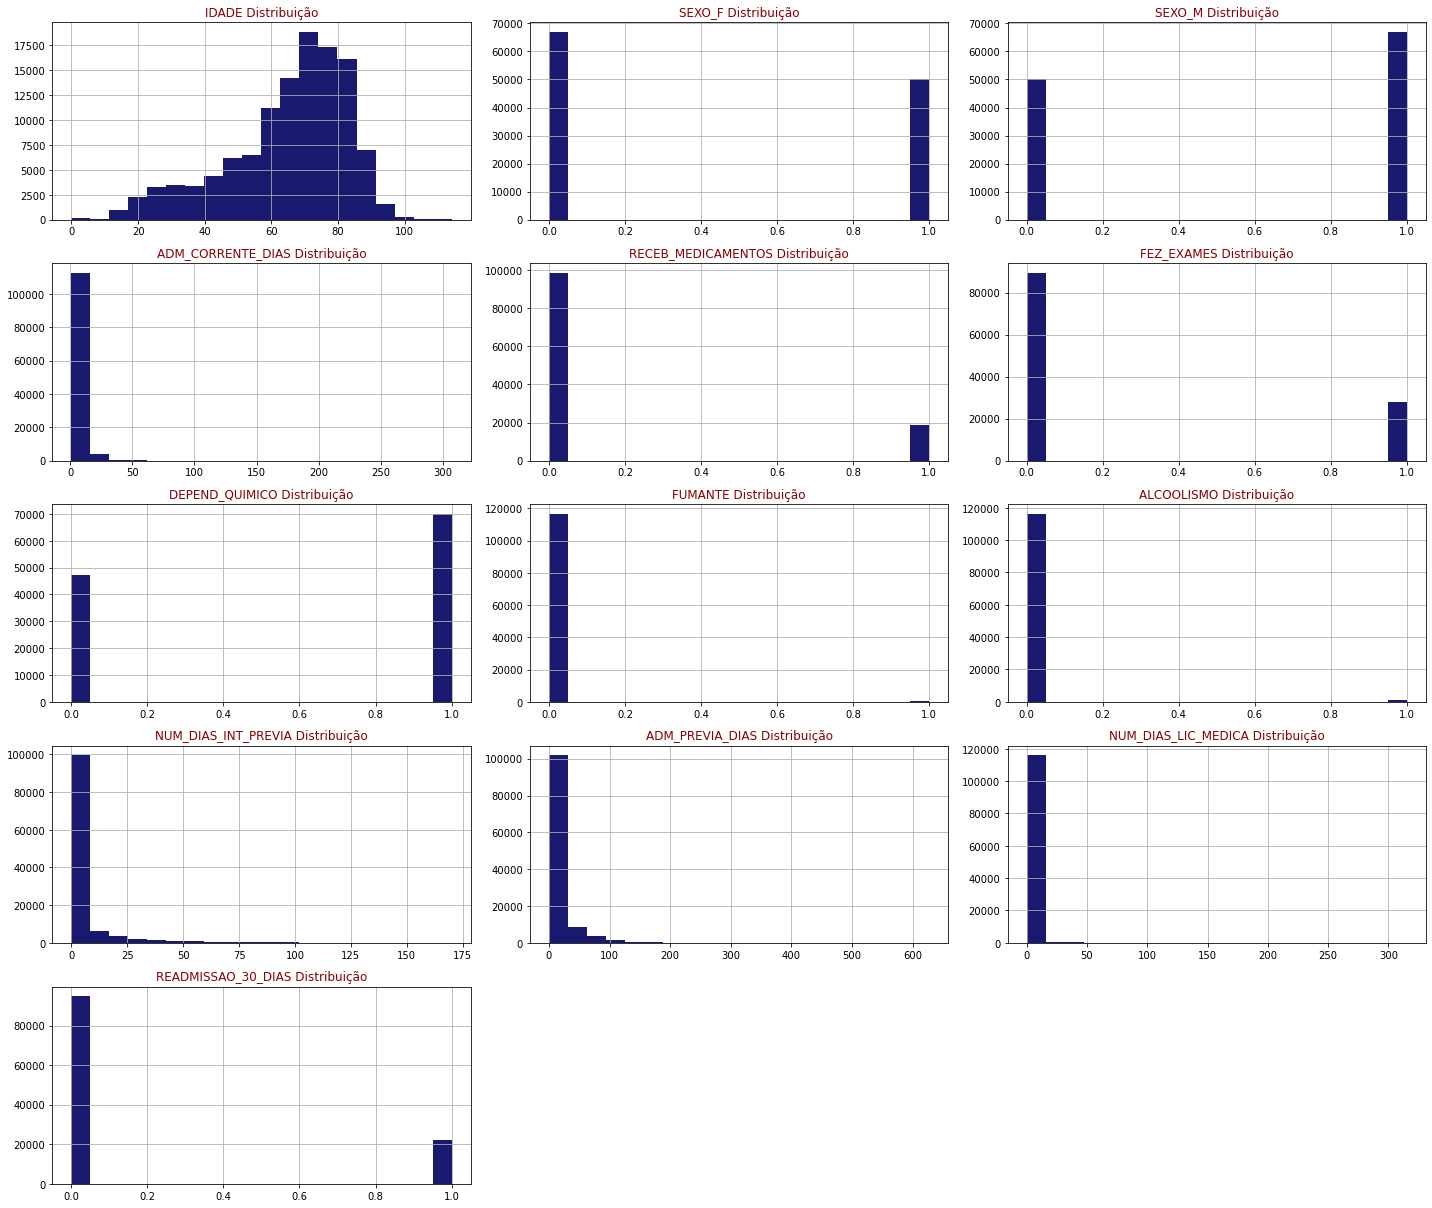

In [13]:
# Executa a função
cria_histograma(dataset, dataset.columns, 6, 3)

Pela análise dos histogramas das variáveis, podemos notar que temos pouquissímos pacientes fumantes ou com alcoolismo. Por outro lado, temos mais pacientes com dependência química. O que leva supor, que trata-se de uma clínica para pessoas dependentes de medicamentos, por exemplo.

## 3) Data Munging - Preparando dados para análise exploratória

### 3.1 - Checando Outliers

Valores outliers são um problema no conjunto de dados, pois eles contribuem para um modelo menos preciso. Por isso, é uma boa ideia removê-los.

In [14]:
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


Outliers da variável idade

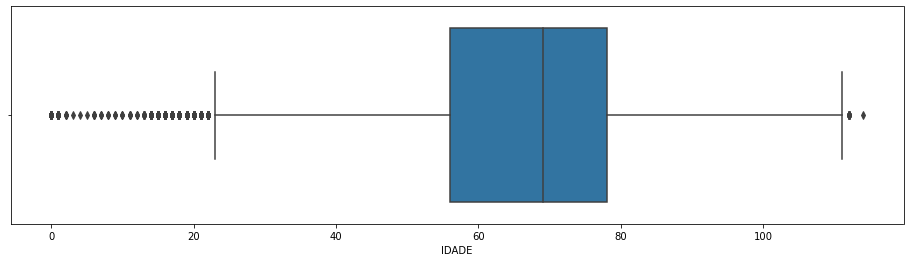

In [15]:
sns.boxplot(dataset.IDADE)

Podemos verificar valores outliers acima de 100 anos e abaixo dos 20. Sendo assim, vamos remover valores maiores do que 100 e menores do que 5 anos.

In [16]:
# Outliers para a variável IDADE
outliers_idade = dataset[(dataset['IDADE'] > 110) | (dataset['IDADE'] < 5)] 
outliers_idade.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
5204,0.0,0,1,3,1,0,0,0,0,0,0,0,0
9588,0.0,1,0,1,0,1,0,0,0,0,0,0,0
12103,2.0,1,0,1,1,0,0,0,0,1,3,0,0
19961,0.0,0,1,13,0,0,1,0,0,0,0,0,0
21779,0.0,0,1,2,0,0,1,0,0,0,0,0,0


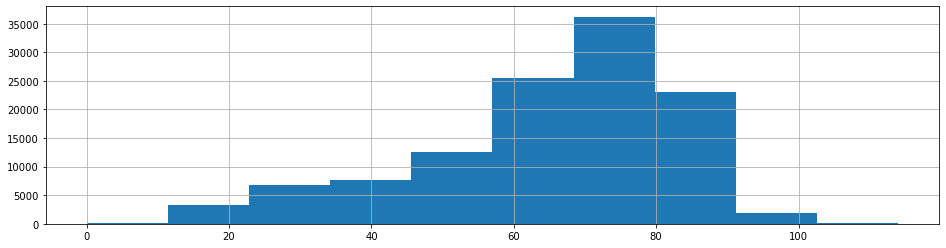

In [17]:
# Histograma da variável IDADE antes da limpeza
dataset.IDADE.hist()

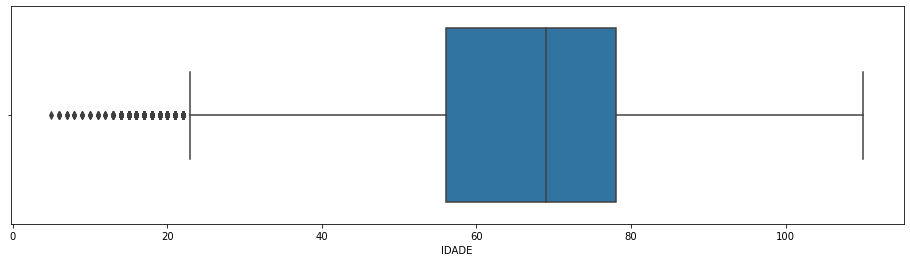

In [18]:
# Vamos remover os outliers
dataset = dataset.drop(dataset[(dataset['IDADE'] > 110) | (dataset['IDADE'] < 5)].index)
sns.boxplot(dataset.IDADE)

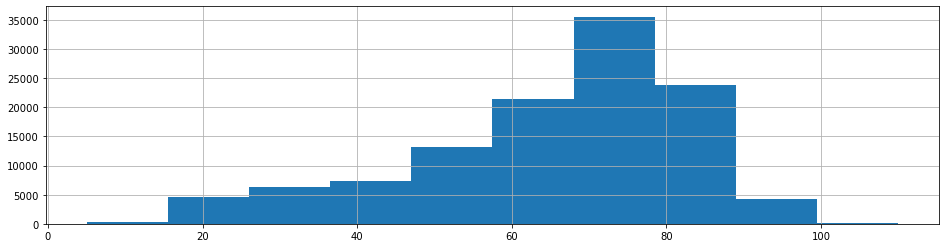

In [19]:
# Histograma da variável idade após a limpeza
dataset.IDADE.hist()

Outliers da variável ADM_CORRENTE_DIAS

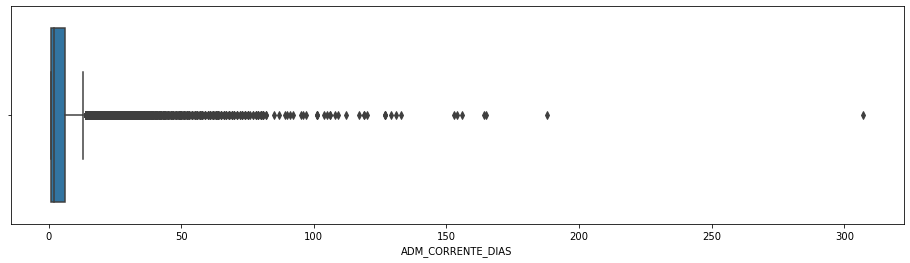

In [20]:
# Visualizando os outliers da variável ADM_CORRENTE_DIAS
sns.boxplot(dataset.ADM_CORRENTE_DIAS)

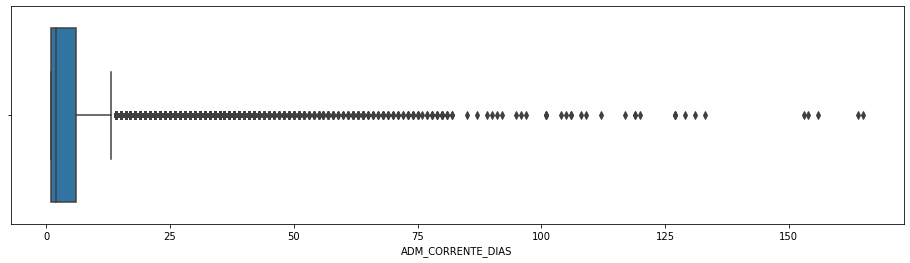

In [21]:
# Vamos remover os outliers
dataset = dataset.drop(dataset[(dataset['ADM_CORRENTE_DIAS'] > 180)].index)
sns.boxplot(dataset.ADM_CORRENTE_DIAS)

Outliers da variável NUM_DIAS_INT_PREVIA

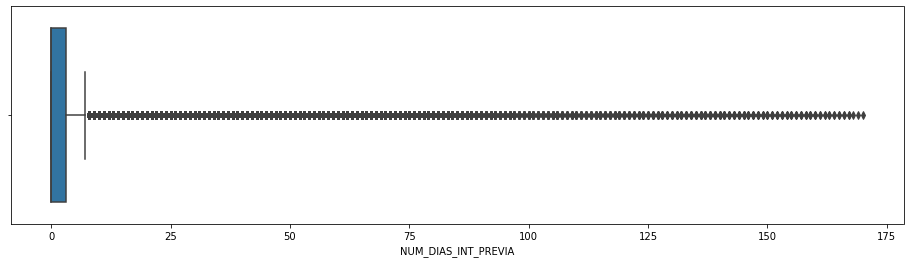

In [22]:
# Visualizando os outliers da variável NUM_DIAS_INT_PREVIA
sns.boxplot(dataset.NUM_DIAS_INT_PREVIA)

Como temos muito outliers, melhor mantermos esses valores

Outliers da variável ADM_PREVIA_DIAS

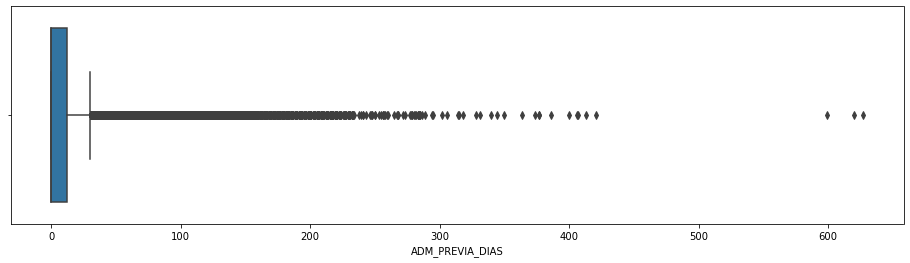

In [23]:
# Visualizando os outliers da variável ADM_PREVIA_DIAS
sns.boxplot(dataset.ADM_PREVIA_DIAS)

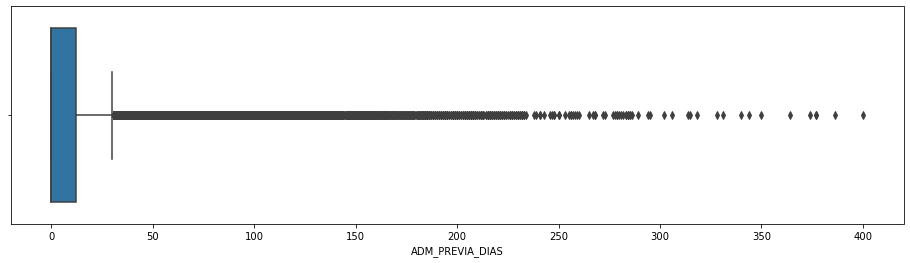

In [24]:
# Vamos remover os outliers
dataset = dataset.drop(dataset[(dataset['ADM_PREVIA_DIAS'] > 400)].index)
sns.boxplot(dataset.ADM_PREVIA_DIAS)

Outliers da variável NUM_DIAS_LIC_MEDICA

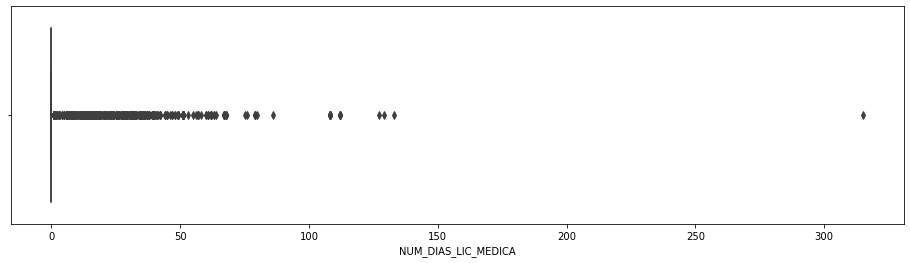

In [25]:
# Visualizando os outliers da variável NUM_DIAS_LIC_MEDICA
sns.boxplot(dataset.NUM_DIAS_LIC_MEDICA)

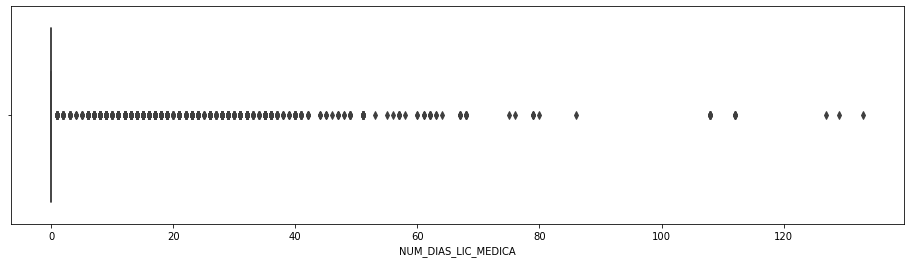

In [26]:
# Vamos remover os outliers
dataset = dataset.drop(dataset[(dataset['NUM_DIAS_LIC_MEDICA'] > 150)].index)
sns.boxplot(dataset.NUM_DIAS_LIC_MEDICA)

In [27]:
#Após a exclusão dos valores outliers, esse é o novo formato do nosso dataset
dataset.shape

(117000, 13)

### 3.2 - Correlação e Associação de variáveis

In [28]:
# Criando uma cópia do dataset original
dataset_teste = dataset.copy()

In [29]:
# Cópia do dataset
dataset_teste.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


In [30]:
dataset_teste.dtypes

IDADE                  float64
SEXO_F                   int64
SEXO_M                   int64
ADM_CORRENTE_DIAS        int64
RECEB_MEDICAMENTOS       int64
FEZ_EXAMES               int64
DEPEND_QUIMICO           int64
FUMANTE                  int64
ALCOOLISMO               int64
NUM_DIAS_INT_PREVIA      int64
ADM_PREVIA_DIAS          int64
NUM_DIAS_LIC_MEDICA      int64
READMISSAO_30_DIAS       int64
dtype: object

Embora temos todas as variáveis como sendo do tipo numérico, algumas delas são do tipo categórico. Vamos então fazer a conversão para trabalharmos correlação e associação

In [31]:
# Convertendo as variáveis categóricas para o tipo categórico em Python
# Como queremos apenas avaliar a associação com a variável resposta estamos trabalhando com uma cópia do dataset original.
dataset_teste['SEXO_F'] = dataset_teste['SEXO_F'].astype('category')
dataset_teste['SEXO_M'] = dataset_teste['SEXO_M'].astype('category')
dataset_teste['RECEB_MEDICAMENTOS'] = dataset_teste['RECEB_MEDICAMENTOS'].astype('category')
dataset_teste['FEZ_EXAMES'] = dataset_teste['FEZ_EXAMES'].astype('category')
dataset_teste['DEPEND_QUIMICO'] = dataset_teste['DEPEND_QUIMICO'].astype('category')
dataset_teste['FUMANTE'] = dataset_teste['FUMANTE'].astype('category')
dataset_teste['ALCOOLISMO'] = dataset_teste['ALCOOLISMO'].astype('category')
dataset_teste['READMISSAO_30_DIAS'] = dataset_teste['READMISSAO_30_DIAS'].astype('category')

In [32]:
# Visualizando os tipos de dados
dataset_teste.dtypes

IDADE                   float64
SEXO_F                 category
SEXO_M                 category
ADM_CORRENTE_DIAS         int64
RECEB_MEDICAMENTOS     category
FEZ_EXAMES             category
DEPEND_QUIMICO         category
FUMANTE                category
ALCOOLISMO             category
NUM_DIAS_INT_PREVIA       int64
ADM_PREVIA_DIAS           int64
NUM_DIAS_LIC_MEDICA       int64
READMISSAO_30_DIAS     category
dtype: object

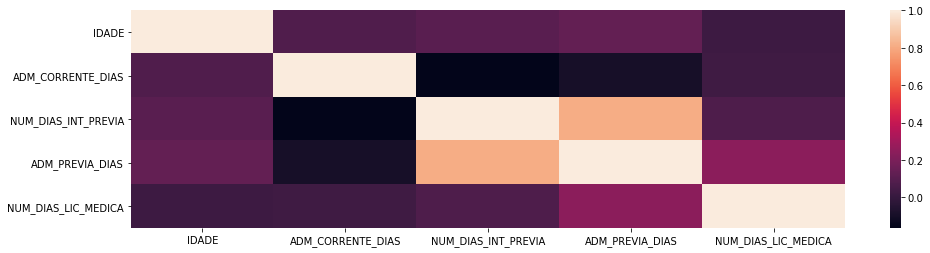

In [33]:
# Coeficiente de correlação é calculado para variáveis numéricas
dataset_teste_corr = dataset_teste.corr()
sns.heatmap(dataset_teste_corr)

Função para calcular a associação entre variáveis categóricas

In [34]:
# Pacote stats do Scipy
import scipy.stats as ss

#Vamos usar a estatística Cramér-V

# A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.

# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [35]:
# Coleta as variáveis categóricas do dataset
from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_numeric_dtype

categorical_vars = []

for column in dataset_teste:
    if is_categorical_dtype(dataset_teste[column]):
        categorical_vars.append(column)

In [36]:
categorical_vars

['SEXO_F',
 'SEXO_M',
 'RECEB_MEDICAMENTOS',
 'FEZ_EXAMES',
 'DEPEND_QUIMICO',
 'FUMANTE',
 'ALCOOLISMO',
 'READMISSAO_30_DIAS']

In [37]:
y = 'READMISSAO_30_DIAS'

print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:', 
          cramers_v(dataset_teste[var], dataset_teste[y]))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


Associação da Variável SEXO_F com a variável resposta: 0.08140312484489556
Associação da Variável SEXO_M com a variável resposta: 0.08140312484489556
Associação da Variável RECEB_MEDICAMENTOS com a variável resposta: 0.14274972262281213
Associação da Variável FEZ_EXAMES com a variável resposta: 0.3512134549958696
Associação da Variável DEPEND_QUIMICO com a variável resposta: 0.21078933128660998
Associação da Variável FUMANTE com a variável resposta: 0.08791877346862986
Associação da Variável ALCOOLISMO com a variável resposta: 0.0151160465712889
Associação da Variável READMISSAO_30_DIAS com a variável resposta: 0.9999721770541886


Pela análise acima, a variável com maior relação associação com a variável alvo é a "RECEB_MEDICAMENTOS" com valor de 0.14. Por enquanto não vou remover nenhuma variável

### 3.3 - Pré-Processamento

Vamos verificar se a variável resposta READMISSAO_30_DIAS está balanceada

In [38]:
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


In [39]:
# Verificando se a variável resposta está balanceada
target_count = dataset.READMISSAO_30_DIAS.value_counts()
target_count

0    94827
1    22173
Name: READMISSAO_30_DIAS, dtype: int64

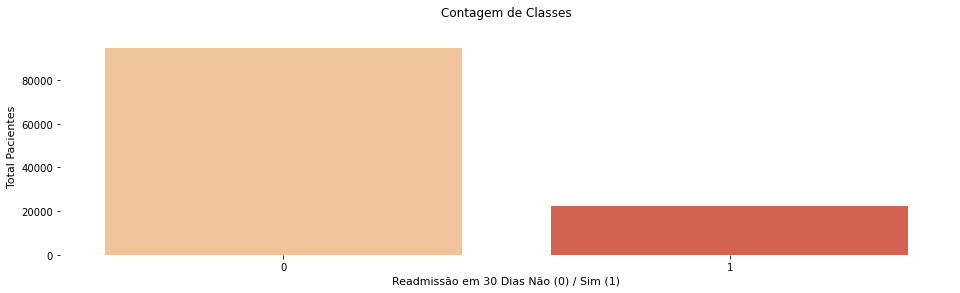

In [40]:
# Plot 
sns.countplot(dataset.READMISSAO_30_DIAS, palette = "OrRd")
plt.box(False)
plt.xlabel('Readmissão em 30 Dias Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

Pela análise gráfica, percebe-se claramente que a classe alvo está desbalanceada, com muito mais registros de pacientes que "não foram readmitidos em 30 dias (0)". 

In [41]:
# Variáveis Explicativas
dataset.iloc[:, 0:12]  

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA
ID,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0
1,24.0,0,1,2,0,0,1,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129995,79.0,0,1,1,1,0,0,0,0,1,1,0
129996,61.0,0,1,1,0,1,0,0,0,1,9,0
129997,52.0,0,1,4,1,0,0,0,0,0,0,0


In [42]:
# Variável Target
dataset.iloc[:, -1] 

ID
0         1
1         0
2         0
3         0
4         0
         ..
129995    0
129996    1
129997    0
129998    0
129999    0
Name: READMISSAO_30_DIAS, Length: 117000, dtype: int64

Vamos fazer o balanceamento de classes usando "over sampling" porque isso aumentará o número da classe que está em menor número. E consequentemente, aumentará o nº de registros do meu conjunto de dados, facilitando a aprendizagem do modelo.

In [43]:
# Importa a função

from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Separa X e y
X = dataset.iloc[:, 0:12]  
y = dataset.iloc[:, -1] 

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

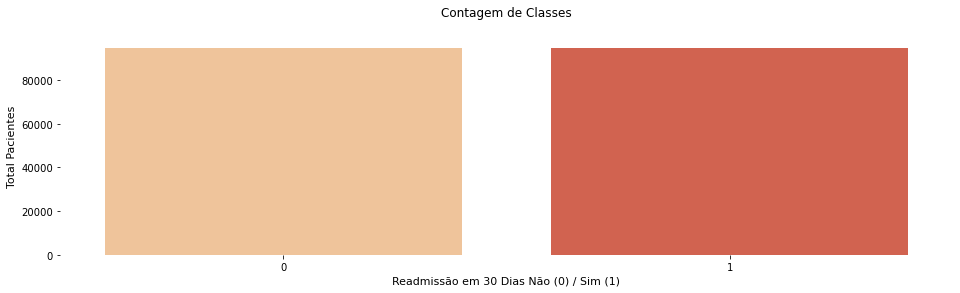

In [44]:
# Plot
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Readmissão em 30 Dias Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [45]:
# Split em X e Y
X = X_res
Y = y_res

In [46]:
X.shape

(189654, 12)

In [47]:
Y.shape

(189654,)

In [48]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

test_size = 0.1
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = test_size, random_state = 7)

In [49]:
X_treino.shape

(170688, 12)

In [50]:
Y_treino.shape

(170688,)

In [51]:
X_teste.shape

(18966, 12)

In [52]:
Y_teste.shape

(18966,)

## 4) Modelagem Preditiva - Machine Learning

Vamos importar os pacotes com os modelos que iremos trabalhar

In [54]:
# Imports
import sklearn
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score
from sklearn.metrics import roc_curve, auc

In [55]:
sklearn.__version__

'1.1.2'

### 4.1 -  Versão 1 - Regressão Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [56]:
# Cria e treina o modelo
modelo_v1 = LogisticRegression(max_iter = 600)
modelo_v1.fit(X_treino, Y_treino)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=600)

In [57]:
# Previsões (probabilidades)
previsoes_v1 = modelo_v1.predict_proba(X_teste)
previsoes_v1

array([[0.73275155, 0.26724845],
       [0.17983003, 0.82016997],
       [0.00150712, 0.99849288],
       ...,
       [0.19840095, 0.80159905],
       [0.00197145, 0.99802855],
       [0.20313511, 0.79686489]])

In [58]:
# Previsões (classes)
previsoes_v1 = modelo_v1.predict(X_teste)
previsoes_v1

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

### Analisando as métricas do modelo de Regressão Logística

In [59]:
matriz_v1 = confusion_matrix(Y_teste, previsoes_v1)
print(matriz_v1)

[[7814 1688]
 [2666 6798]]


In [60]:
# Relatório de classificação
classe_names = ['Não Readmitido (0)', 'Readmitido (1)']
report = classification_report(Y_teste, previsoes_v1, target_names = classe_names)
print(report)

                    precision    recall  f1-score   support

Não Readmitido (0)       0.75      0.82      0.78      9502
    Readmitido (1)       0.80      0.72      0.76      9464

          accuracy                           0.77     18966
         macro avg       0.77      0.77      0.77     18966
      weighted avg       0.77      0.77      0.77     18966



In [61]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v1))

0.7703270593208744


In [62]:
# Score AUCROC - Caso 2 (usando as probabilidades)
y_pred_probs = modelo_v1.predict_proba(X_teste)[:,1] # Usamos [:,1] para buscar as probabilidades da classe positiva.
print(roc_auc_score(Y_teste, y_pred_probs))

0.8356961721187673


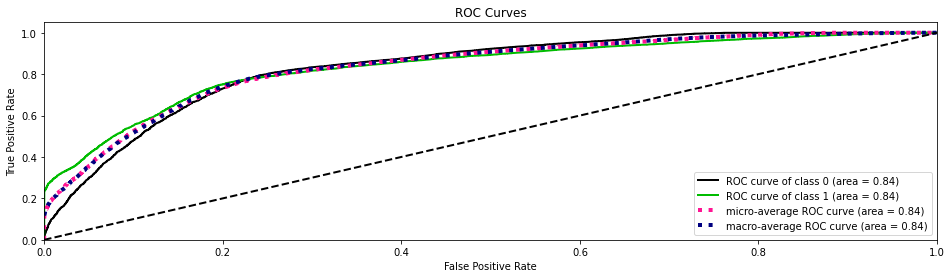

In [63]:
# Calcula a Curva ROC para cada classe
y_probs_v1 = modelo_v1.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v1)
plt.show()

In [64]:
# Coeficiente de Correlação de Matthews
print(matthews_corrcoef(Y_teste, previsoes_v1))

0.5436660823547719


### 4.2 - Versão 2 - RandomForest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Agora vamos criar um modelo Random Forest, um conjunto de árvores de decisão

In [65]:
# Cria e treina o modelo
modelo_v2 = RandomForestClassifier(n_estimators = 150)
modelo_v2.fit(X_treino, Y_treino)

RandomForestClassifier(n_estimators=150)

In [66]:
# Previsões
previsoes_v2 = modelo_v2.predict(X_teste)
matriz_v2 = confusion_matrix(Y_teste, previsoes_v2)
print(matriz_v2)

[[8127 1375]
 [1709 7755]]


### Analisando as métricas do modelo Random Forest

In [67]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v2)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      9502
           1       0.85      0.82      0.83      9464

    accuracy                           0.84     18966
   macro avg       0.84      0.84      0.84     18966
weighted avg       0.84      0.84      0.84     18966



In [68]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v2))

0.837357293023509


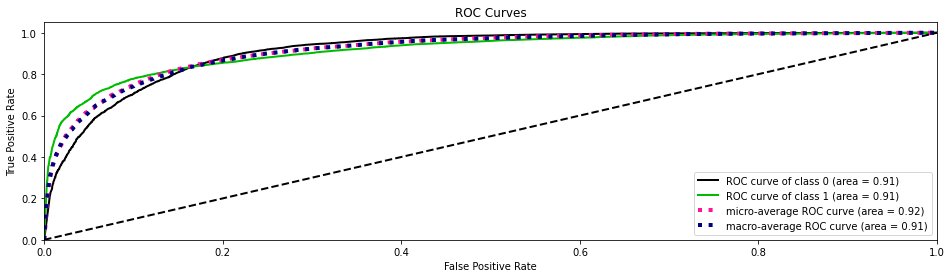

In [69]:
# Calcula a Curva ROC para cada classe
y_probs_v2 = modelo_v2.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v2)
plt.show()

In [70]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v2))

0.6751811810370526


Em uma comparação inicial, nota-se que o modelo Random Forest é claramente superior ao da Regressão Logística

In [71]:
X_treino.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA
146799,76.115183,0,1,1,0,1,0,0,0,2,2,0
13873,54.000000,0,1,1,1,0,0,0,0,0,0,0
141112,53.000000,0,1,1,0,1,0,0,0,3,8,0
178346,42.949670,0,1,1,0,0,1,0,0,0,0,0
49564,73.000000,0,1,7,0,0,1,0,0,0,0,0


### 4.3 - Versão 3 - Naive Bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

Um classificador Naive Bayes é um modelo probabilístico de aprendizado de máquina usado para tarefas de classificação. 

In [73]:
# Cria e treina o modelo GaussianNB (variáveis quantitativas com distribuição normal)
modelo_v3 = GaussianNB()
modelo_v3.fit(X_treino, Y_treino)

GaussianNB()

In [74]:
# Previsões
previsoes_v3 = modelo_v3.predict(X_teste)
matriz_v3 = confusion_matrix(Y_teste, previsoes_v3)
print(matriz_v3)

[[7686 1816]
 [3276 6188]]


In [75]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v3)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      9502
           1       0.77      0.65      0.71      9464

    accuracy                           0.73     18966
   macro avg       0.74      0.73      0.73     18966
weighted avg       0.74      0.73      0.73     18966



In [76]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v3))

0.731364247203018


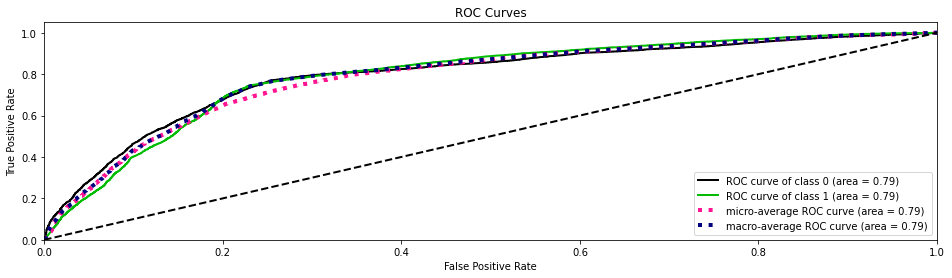

In [77]:
# Calcula a Curva ROC para cada classe
y_probs_v3 = modelo_v3.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v3)
plt.show()

In [78]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v3))

0.4684601830722671


Esse modelo tem uma interpretação global muito ruim, com o Coeficiente de Correlação Matthews de 0.46

### 4.4 - Versão 4 - KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Algoritmo K-vizinhos mais próximos (ou K-Nearest Neighbors - KNN) é um dos algoritmos de classificação mais simples e é um dos algoritmos de aprendizado mais utilizados. 

In [79]:
# Cria e treina o modelo
modelo_v4 = KNeighborsClassifier()
modelo_v4.fit(X_treino, Y_treino)

KNeighborsClassifier()

In [80]:
# Previsões
previsoes_v4 = modelo_v4.predict(X_teste)
matriz_v4 = confusion_matrix(Y_teste, previsoes_v4)
print(matriz_v4)

[[7316 2186]
 [1618 7846]]


In [81]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v4)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      9502
           1       0.78      0.83      0.80      9464

    accuracy                           0.80     18966
   macro avg       0.80      0.80      0.80     18966
weighted avg       0.80      0.80      0.80     18966



In [82]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v4))

0.7994897590630472


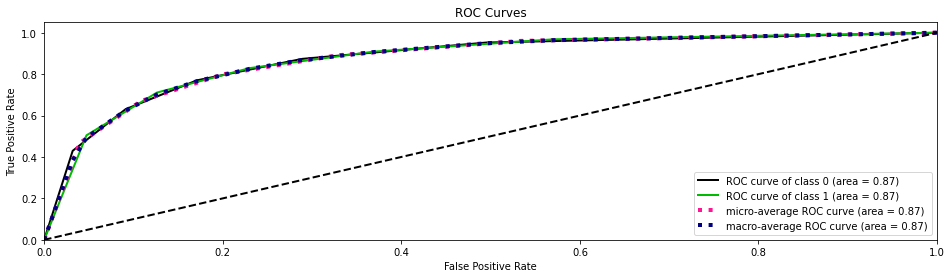

In [83]:
# Calcula a Curva ROC para cada classe
y_probs_v4 = modelo_v4.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v4)
plt.show()

In [84]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v4))

0.5999846163047807


Ate agora, esse foi o segundo melhor modelo de aprendizagem que criamos.

## 5) Escolhendo a melhor versão do modelo preditivo

### 5.1 - Comparação dos modelos

In [85]:
# Comparando o Score AUC dos modelos

# Cria lista vazia
lista_auc = []

# Calcula o Score AUC para cada modelo
auc_modelo_v1 = roc_auc_score(Y_teste, previsoes_v1)
auc_modelo_v2 = roc_auc_score(Y_teste, previsoes_v2)
auc_modelo_v3 = roc_auc_score(Y_teste, previsoes_v3)
auc_modelo_v4 = roc_auc_score(Y_teste, previsoes_v4)


# Junta os resultados em uma lista
lista_auc = [auc_modelo_v1, auc_modelo_v2, auc_modelo_v3, auc_modelo_v4]

In [86]:
# Comparando o Coeficiente de Correlação de Matthews dos modelos

# Cria lista vazia
lista_mcorr = []

# Calcula o Coeficiente para cada modelo
mcorr_v1 = matthews_corrcoef(Y_teste, previsoes_v1)
mcorr_v2 = matthews_corrcoef(Y_teste, previsoes_v2)
mcorr_v3 = matthews_corrcoef(Y_teste, previsoes_v3)
mcorr_v4 = matthews_corrcoef(Y_teste, previsoes_v4)


# Junta os resultados em uma lista
lista_mcorr = [mcorr_v1, mcorr_v2, mcorr_v3, mcorr_v4]

In [87]:
# Comparando a Acurácia dos modelos

# Cria lista vazia
lista_acc = []

# Calcula a Acurácia para cada modelo
acc_modelo_v1 = accuracy_score(Y_teste, previsoes_v1)
acc_modelo_v2 = accuracy_score(Y_teste, previsoes_v2)
acc_modelo_v3 = accuracy_score(Y_teste, previsoes_v3)
acc_modelo_v4 = accuracy_score(Y_teste, previsoes_v4)

# Junta os resultados em uma lista
lista_acc = [acc_modelo_v1, acc_modelo_v2, acc_modelo_v3, acc_modelo_v4]

In [88]:
# Concatena as 3 listas de métricas em uma única tabela
lista_metricas = pd.DataFrame(np.column_stack([lista_auc, lista_mcorr, lista_acc]), 
                              columns = ['AUC', 'Matthews', 'Acurácia'])

# Adiciona uma coluna com os nomes dos modelos
lista_metricas['Modelo'] = ['Regressão Logística', 'RandomForest', 'Naive Bayes', 'KNN']

In [89]:
# Lista as métricas por ordem decrescente do Score AUC
lista_metricas.sort_values(by ='AUC', ascending = False)

,AUC,Matthews,Acurácia,Modelo
1,0.837357,0.675181,0.837393,RandomForest
3,0.799490,0.599985,0.799431,KNN
0,0.770327,0.543666,0.770431,Regressão Logística
2,0.731364,0.468460,0.731520,Naive Bayes


O que apresentou a melhor versão foi o RandomForest. Sendo assim, vamos usá-lo como nossa versão final

### 5.2 - Preparando a Versão Final do Modelo

Vamos usar nosso segundo modelo, porque ele teve a melhor performance

In [94]:
# Salvando o modelo
import pickle
filename = 'modelos/modelo_v2.sav'
pickle.dump(modelo_final_rf, open(filename, 'wb'))

In [95]:
# Carregando o Modelo
classificador_pacientes = pickle.load(open(filename, 'rb'))

In [96]:
classificador_pacientes

RandomForestClassifier(n_estimators=150)

## 6) Deploy do Modelo

In [97]:
# Os novos dados devem estar no mesmo formato usado nos dados de teste
X_teste.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA
138614,77.000000,1,0,5,0,0,1,0,0,1,6,0
120432,58.197334,0,1,1,0,1,0,0,0,24,85,0
189012,64.841510,0,1,1,0,0,0,0,0,37,57,0
18712,69.000000,1,0,5,0,0,1,0,0,0,0,0
160167,60.000000,0,1,1,0,0,0,0,0,8,66,0


In [98]:
X_teste.shape

(18966, 12)

In [99]:
# Dados de um novo paciente
novo_paciente = np.array([54,1,0,1,0,1,0,0,0,0,0,0])
print(novo_paciente.shape)
print(novo_paciente)

(12,)
[54  1  0  1  0  1  0  0  0  0  0  0]


In [100]:
# Ajustando o shape dos dados para o modelo
novo_paciente_reshaped = novo_paciente.reshape(1, -1)
print(novo_paciente_reshaped.shape)
print(novo_paciente_reshaped)

(1, 12)
[[54  1  0  1  0  1  0  0  0  0  0  0]]


In [107]:
# Fazendo a previsão
print("\nO paciente será readmitido na clínica em até 30 dias após a alta?")
previsao = modelo_v2.predict(novo_paciente_reshaped)
if previsao == 0:
      print("\nNão, o paciente não deve ser readmitido na clínica em até 30 dias após a alta.")
else:
      print("\nSim, o paciente deve ser readmitido na clínica em até 30 dias após a alta.")


O paciente será readmitido na clínica em até 30 dias após a alta?

Sim, o paciente deve ser readmitido na clínica em até 30 dias após a alta.


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Fim